In [1]:
! pip install kaggle

  Using cached kaggle-1.7.4.5-py3-none-any.whl.metadata (16 kB)
  Using cached bleach-6.2.0-py3-none-any.whl.metadata (30 kB)
  Using cached python_slugify-8.0.4-py2.py3-none-any.whl.metadata (8.5 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl.metadata (2.4 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
Using cached kaggle-1.7.4.5-py3-none-any.whl (181 kB)
Using cached bleach-6.2.0-py3-none-any.whl (163 kB)
Using cached python_slugify-8.0.4-py2.py3-none-any.whl (10 kB)
Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
Using cached webencodings-0.5.1-py2.py3-none-any.whl (11 kB)

   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   ------------------------ --------------- 3/5 [bleach]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   -------------------------------- ------- 4/5 [kaggle]
   ----------------

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mohamedmustafa/real-life-violence-situations-dataset")

print("Path to dataset files:", path)

c:\Users\admin\anaconda3\envs\py311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\admin\.cache\kagglehub\datasets\mohamedmustafa\real-life-violence-situations-dataset\versions\1


In [1]:
import os

In [4]:
path = os.path.join(path,"Real Life Violence Dataset")

In [5]:
os.listdir(path)

['NonViolence', 'Violence']

In [6]:
violence_dataset = os.path.join(path, 'Violence')

non_violence_dataset = os.path.join(path, 'NonViolence')

In [7]:
violence_dataset

'C:\\Users\\admin\\.cache\\kagglehub\\datasets\\mohamedmustafa\\real-life-violence-situations-dataset\\versions\\1\\Real Life Violence Dataset\\Violence'

In [8]:
import cv2

In [9]:
def extract_frames(video_path, skip_frames=7):
    frames = []
    cap = cv2.VideoCapture(video_path)

    if not cap.isOpened():
        print(f"Error: Cannot open video {video_path}")
        return None
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % skip_frames == 0:

            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

            resized_frame = cv2.resize(frame, (128, 128))

            normalize_frames = resized_frame.astype('float32') / 255.0

            frames.append(normalize_frames)

        frame_count += 1
        
        cap.release()

    return frames

In [10]:
violance_frames = []

non_violance_frames = []

In [11]:
len(violence_dataset), len(non_violence_dataset)

(140, 143)

In [12]:
for filename in os.listdir(violence_dataset):
    if filename.endswith('.mp4'):
        video_path = os.path.join(violence_dataset, filename)
        frames = extract_frames(video_path)
        violance_frames.extend(frames)

In [13]:
print(violance_frames)

[array([[[0.69803923, 0.5176471 , 0.23529412],
        [0.7254902 , 0.5411765 , 0.2627451 ],
        [0.6039216 , 0.43137255, 0.19215687],
        ...,
        [0.6392157 , 0.7254902 , 0.7137255 ],
        [0.5803922 , 0.6666667 , 0.654902  ],
        [0.63529414, 0.7294118 , 0.7176471 ]],

       [[0.7058824 , 0.5294118 , 0.25882354],
        [0.7372549 , 0.56078434, 0.29803923],
        [0.61960787, 0.4509804 , 0.2       ],
        ...,
        [0.64705884, 0.7294118 , 0.7294118 ],
        [0.6509804 , 0.73333335, 0.73333335],
        [0.65882355, 0.7490196 , 0.74509805]],

       [[0.72156864, 0.54901963, 0.25490198],
        [0.7058824 , 0.5294118 , 0.2509804 ],
        [0.6509804 , 0.47843137, 0.23137255],
        ...,
        [0.654902  , 0.74509805, 0.7490196 ],
        [0.6509804 , 0.73333335, 0.73333335],
        [0.67058825, 0.7764706 , 0.7764706 ]],

       ...,

       [[0.5882353 , 0.5019608 , 0.23137255],
        [0.54901963, 0.4509804 , 0.23137255],
        [0.5372549 , 

In [14]:
for filename in os.listdir(non_violence_dataset):
    if filename.endswith('.mp4'):
        video_path = os.path.join(non_violence_dataset, filename)
        frames = extract_frames(video_path)
        non_violance_frames.extend(frames)

In [15]:
import numpy as np

In [16]:
violance_frames_labels = np.ones(len(violance_frames))

non_violance_frames_labels = np.zeros(len(non_violance_frames))

In [18]:
len(violance_frames_labels), len(non_violance_frames_labels)

(1000, 951)

In [19]:
import matplotlib.pyplot as plt
import random

In [20]:
def plot_sample_frames(frames, title, num_samples=3):
    if not frames:
        print(f"No frames available for {title}")
        return

    # Select random frames
    num_samples = min(num_samples, len(frames))
    sampled_frames = random.sample(frames, num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(num_samples * 3, 3))
    if num_samples == 1:
        axes = [axes]

    for i, frame in enumerate(sampled_frames):
        frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame = cv2.resize(frame, (128, 128))
        axes[i].imshow(frame)
        axes[i].axis("off")

    plt.suptitle(title)
    plt.show()


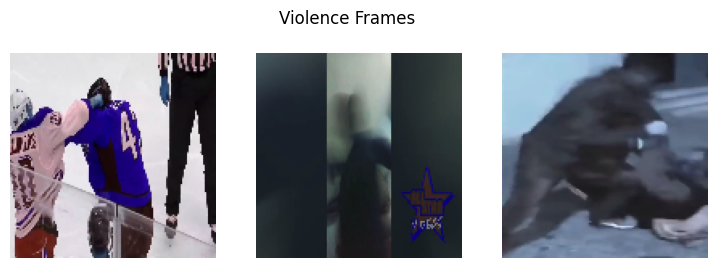

In [21]:
plot_sample_frames(violance_frames, "Violence Frames", num_samples=3)


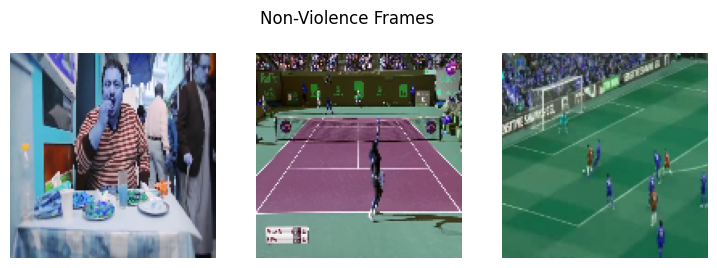

In [22]:
plot_sample_frames(non_violance_frames, "Non-Violence Frames", num_samples=3)

In [23]:
import tensorflow as tf
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras._tf_keras.keras import models
from keras._tf_keras.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Input

In [24]:
matrix = np.array(violance_frames + non_violance_frames)

labels = np.concatenate([violance_frames_labels, non_violance_frames_labels])

In [25]:
x_train, x_test, y_train, y_test = train_test_split(matrix, labels, test_size=0.2, random_state=42)

In [26]:
def cnn_model(input_shape):
  model = models.Sequential()

  model.add(Input(shape= input_shape))

  # First Conv2D layer with MaxPooling
  model.add(Conv2D(32, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  # Second Conv2D layer with MaxPooling
  model.add(Conv2D(64, (3, 3), activation='relu'))
  model.add(MaxPooling2D((2, 2)))

  # Flatten the feature maps for the fully connected layers
  model.add(Flatten())
  # Fully connected layers with Dropout
  model.add(Dense(32, activation='relu'))

  model.add(Dropout(0.5))

  # Fully connected layers with Dropout
  model.add(Dense(8, activation='relu'))

  # Output layer for binary classification (violence or non-violence)
  model.add(Dense(1, activation='sigmoid'))

  return model


In [27]:
INPUT_SHAPE = (128, 128, 3)

model = cnn_model(INPUT_SHAPE)

In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │     1,843,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │           264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,862,897 (7.11 MB)

 Trainable params: 1,862,897 (7.11 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [30]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test), verbose="auto")

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 904ms/step - accuracy: 0.5131 - loss: 0.7210 - val_accuracy: 0.5345 - val_loss: 0.6782
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 675ms/step - accuracy: 0.5804 - loss: 0.6631 - val_accuracy: 0.6010 - val_loss: 0.6549
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 734ms/step - accuracy: 0.6569 - loss: 0.6299 - val_accuracy: 0.7596 - val_loss: 0.5396
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 729ms/step - accuracy: 0.7632 - loss: 0.5112 - val_accuracy: 0.7647 - val_loss: 0.4973
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 19s 748ms/step - accuracy: 0.7888 - loss: 0.4820 - val_accuracy: 0.7852 - val_loss: 0.4553
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 667ms/step - accuracy: 0.8266 - loss: 0.3857 - val_accuracy: 0.7954 - val_loss: 0.4279
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 699ms/step - accuracy: 0.8716 - loss: 0.2866 - val_accuracy: 0.7877 - val_loss: 0.4608
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 17s 699ms/step - accuracy: 0.9054 - loss: 0.2388 - val_accu

In [31]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 120ms/step - accuracy: 0.7872 - loss: 0.5186


[0.5064935684204102, 0.8030690550804138]

In [32]:
y_pred = model.predict(x_test)
y_pred_labels = (y_pred > 0.5).astype(int)

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step


In [33]:
classification_report(y_test, y_pred_labels)

'              precision    recall  f1-score   support\n\n         0.0       0.77      0.84      0.80       187\n         1.0       0.84      0.76      0.80       204\n\n    accuracy                           0.80       391\n   macro avg       0.81      0.80      0.80       391\nweighted avg       0.81      0.80      0.80       391\n'

In [49]:
model.save('violence_detection_model.h5')

In [34]:
model.predict(matrix[:10])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 612ms/step


array([[0.8373764 ],
       [0.4966411 ],
       [0.9944353 ],
       [0.9794629 ],
       [0.5947881 ],
       [0.9986692 ],
       [0.999834  ],
       [0.99934095],
       [0.9998853 ],
       [0.99988514]], dtype=float32)